I will be using the South Africa Heart Disease Dataset, located at:
https://www.openml.org/d/1498.

This dataset is composed of a sample of males who are high-risk for heart-disease, sampled from Western Cape, South Africa. 

My goal is to predict people who are at high risk of having coronary heart disease using supervised machine learning methods. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The attributes for this dataset in order are:
* sbp - systolic blood pressure
* tobacco cumulative consumption (in kg)
* ldl - low densiity lipoprotein cholesterol 
* adiposity
* famhist - family history of heart disease (Present, Absent) 
* typea - type-A behavior 
* obesity 
* alcohol - current alcohol consumption 
* age - age at onset 
* chd - response, coronary heart disease

In [61]:
column_names = ['sbp','tcc','ld','adipos','famhist','typea','obese','alc','age','chd']
data = pd.read_csv("../data/heart_disease.csv",names=column_names,header=None)

In [62]:
data.head()

,sbp,tcc,ld,adipos,famhist,typea,obese,alc,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


# Data Cleaning
***

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp        462 non-null int64
tcc        462 non-null float64
ld         462 non-null float64
adipos     462 non-null float64
famhist    462 non-null int64
typea      462 non-null int64
obese      462 non-null float64
alc        462 non-null float64
age        462 non-null int64
chd        462 non-null int64
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


We have no null values in any of the columns which is good (very easy). But we definitely have at least one or two categorical columns here that need to be converted (namely, the family history and the response). 

In [64]:
# let's convert 1's and 2's to 0's and 1's 
data['famhist'] = data['famhist'].map({1:0,2:1}).astype('category')
data['chd'] = data['chd'].map({1:0,2:1}).astype('category')
data.head()

,sbp,tcc,ld,adipos,famhist,typea,obese,alc,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp        462 non-null int64
tcc        462 non-null float64
ld         462 non-null float64
adipos     462 non-null float64
famhist    462 non-null category
typea      462 non-null int64
obese      462 non-null float64
alc        462 non-null float64
age        462 non-null int64
chd        462 non-null category
dtypes: category(2), float64(5), int64(3)
memory usage: 30.0 KB


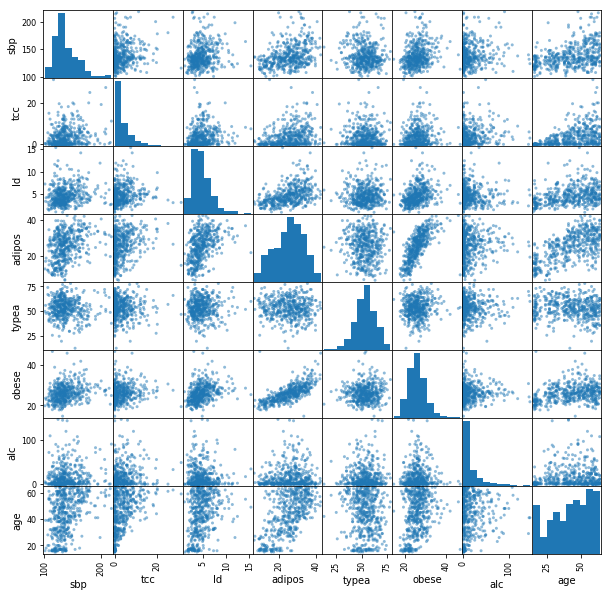

In [66]:
from pandas.plotting import scatter_matrix
scatter_matrix( data ,figsize=(10,10))
plt.show()

So now we can see some correlations between different variables. 

Lets take a look at the distributions of the different variables. Note the categorical variables are not shown here.

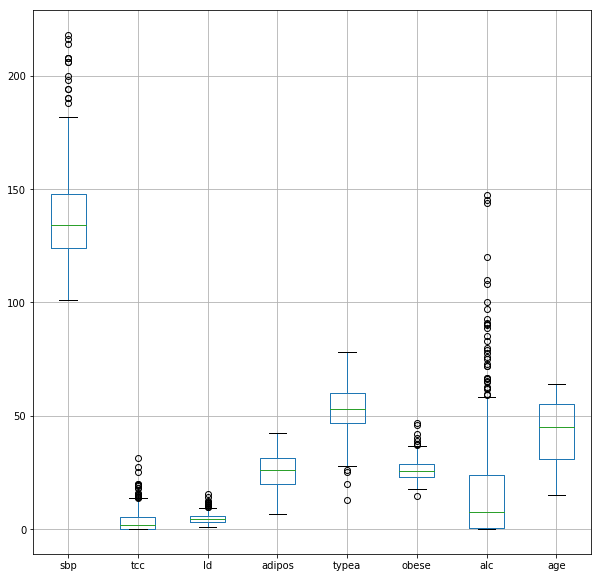

In [67]:
data.boxplot(figsize=(10,10))
plt.show()

# Data Preprocessing
***

We are going to split the test and training data into two different sets, setting aside 20 percent of our dataset from the original dataset. Then we trained the minmax scaler on the training data, and used our 'learned' transformation on the testing data. Finally, we separated out the categorical columns because we don't need to normalize those. Instead if there were mutiple classes within each column, we could performa a one-hot encoding to reduce it into multiple binary columns if necessary. 

/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


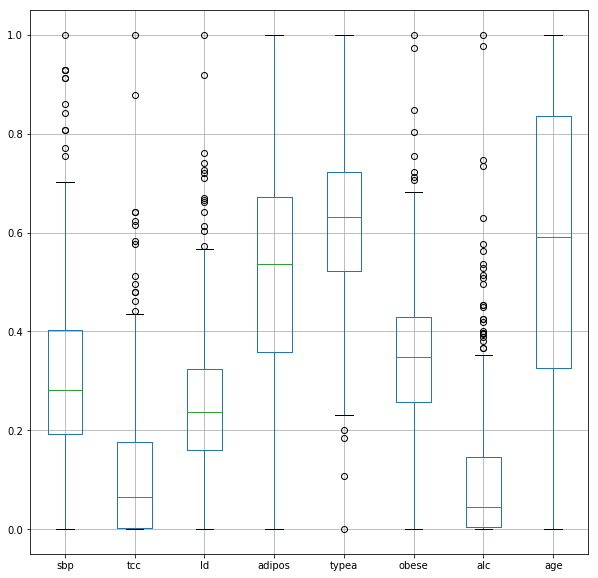

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

ymask = [col for col in data.columns if col == 'chd' ]
xmask = [col for col in data.columns if col != 'chd']
X = data.loc[:,xmask]
y = data.loc[:,ymask]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

numeric_cols = [col for col in X.columns if col != 'famhist']

scaler = MinMaxScaler()
X_train_numeric = X_train.loc[:,numeric_cols]
X_test_numeric = X_test.loc[:,numeric_cols]
X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric),columns=X_train_numeric.columns)
X_test_numeric = pd.DataFrame(scaler.transform(X_test_numeric),columns=X_train_numeric.columns)

X_train_numeric.boxplot(figsize=(10,10))
plt.show()

In [74]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 8 columns):
sbp       369 non-null float64
tcc       369 non-null float64
ld        369 non-null float64
adipos    369 non-null float64
typea     369 non-null float64
obese     369 non-null float64
alc       369 non-null float64
age       369 non-null float64
dtypes: float64(8)
memory usage: 23.1 KB


In [69]:
X_train = pd.concat([X_train_numeric,X_train.loc[:,'famhist']],axis=1)
X_test = pd.concat([X_test_numeric,X_test.loc[:,'famhist']],axis=1)

In [83]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 411 to 102
Data columns (total 9 columns):
sbp        369 non-null int64
tcc        369 non-null float64
ld         369 non-null float64
adipos     369 non-null float64
famhist    369 non-null category
typea      369 non-null int64
obese      369 non-null float64
alc        369 non-null float64
age        369 non-null int64
dtypes: category(1), float64(5), int64(3)
memory usage: 26.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 225 to 347
Data columns (total 9 columns):
sbp        93 non-null int64
tcc        93 non-null float64
ld         93 non-null float64
adipos     93 non-null float64
famhist    93 non-null category
typea      93 non-null int64
obese      93 non-null float64
alc        93 non-null float64
age        93 non-null int64
dtypes: category(1), float64(5), int64(3)
memory usage: 6.7 KB
None


# SVM
***

In [86]:
from sklearn import svm
svm_clsfr = svm.SVC( kernel='linear')
svm_clsfr.fit(X_train,y_train.values)
svm_predictions = svm_clsfr.predict(X_test)

/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_mat = confusion_matrix( y_test, svm_predictions )
print("Confusion matrix: \n",conf_mat)
print("Accuracy: ",accuracy_score(y_test, svm_predictions))

Confusion matrix: 
 [[54  5]
 [17 17]]
Accuracy:  0.7634408602150538


# KNN
***

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_clsfr = KNeighborsClassifier( n_neighbors=4, n_jobs=-1, leaf_size=60, algorithm='brute')

In [94]:
knn_clsfr.fit(X_train, y_train)
knn_predictions = knn_clsfr.predict(X_test)

knn_cov_mat = confusion_matrix( y_test, knn_predictions)
knn_accuracy = accuracy_score( y_test, knn_predictions)
print("Confusion matrix: \n",knn_cov_mat)
print("Accuracy: ",knn_accuracy)

Confusion matrix: 
 [[54  5]
 [30  4]]
Accuracy:  0.6236559139784946


/home/joseph/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


# MLP
***

In [95]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [96]:
mlp = MLPClassifier()

params = {'solver':['lbfgs'], 
         'alpha':[1e-4],
         'hidden_layer_sizes':(9,14,14,2),
         'random_state':[1]}

We need to search the parameter space for the best hyper parameters first using sklearn grid search with the training data. Then we compute the confusion matrix and the accuracy. 

In [97]:

acc_scorer = make_scorer( accuracy_score)

grid_obj = GridSearchCV( mlp, params, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train,y_train)


mlp = grid_obj.best_estimator_

mlp.fit(X_train,y_train)

mlp_predictions = mlp.predict(X_test)

mlp_cov_mat = confusion_matrix( y_test, mlp_predictions )
mlp_acc = accuracy_score( y_test, mlp_predictions)

print("Confusion matrix: \n",mlp_cov_mat)
print("Accuracy: ",mlp_acc)

/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning

Confusion matrix: 
 [[55  4]
 [14 20]]
Accuracy:  0.8064516129032258


/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Summary
***
We got the best prediction accuracy using the multi layer perceptron, at 80%. Then we had the next best with the SVM classifier at 76% and the worst accuracy using the k nearest neighbors classifier at 62%